<a href="https://colab.research.google.com/github/sunjinnn/Blockchain2025/blob/main/25_10_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률적 경사 하강법 (95페이지까지)
모델의 최적 가중치(오차가 가장 적은)를 찾는 방법
가중치를 더 적은 방법으로 찾아서 오차가 더 줄어드는 방향으로 가중치를 이동시키기
어느 순간 오차의 증가 시 반대방향으로 이동시킴

미분을 했다는 말은 그래프의 기울기를 구하겠다는 것

*모델에 따라서 손실함수를 사용할 줄 알아야 한다

인공지능이 어떻게 동작하고 있는지 이해할 것


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.773109243697479
0.775


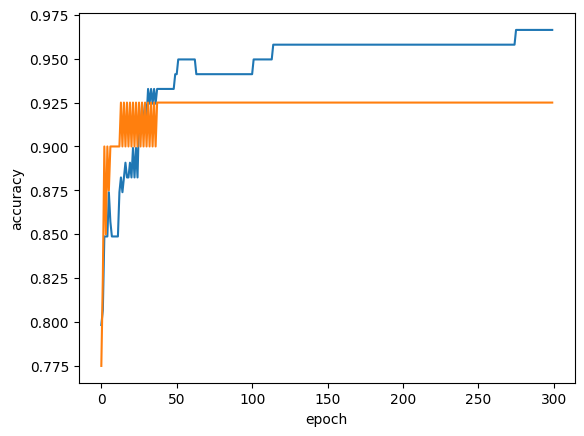

In [26]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#확률적 경사 하강법
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

import numpy as np
train_score=[]
test_score=[]
classes = np.unique(train_target)
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score, label = 'train'); plt.plot(test_score, label='test')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.show()

#추가 학습(훈련) 코드 (학습의 횟수를 몇번 할 것인지, 가중치 값이 계속 변하는 것을 눈으로 확인하기)
# sc.partial_fit(train_scaled, train_target)
# sc.partial_fit(train_scaled, train_target)
# sc.partial_fit(train_scaled, train_target)
# print(sc.score(train_scaled, train_target))
# print(sc.score(test_scaled, test_target))

#여긴 그냥 데이터 찍어보는 용도로 사용한 코드
# # print(fish_target)
# # print(fish_input)
# print(train_input[:5])
# # print(test_input)
# print(train_scaled[:5])
# # print(test_scaled)